# Diego EDA Notebook

Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

%matplotlib inline

Reading csvs

In [2]:
sub_df = pd.read_csv('data/submission_format.csv')
test_vals = pd.read_csv('data/test_set_values.csv')
train_labels = pd.read_csv('data/training_set_labels.csv')
train_vals = pd.read_csv('data/training_set_values.csv')

### Viewing head, info, and some value_counts

In [3]:
sub_df.head()

,id,status_group
0,50785,predicted label
1,51630,predicted label
2,17168,predicted label
3,45559,predicted label
4,49871,predicted label


In [4]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            14850 non-null  int64 
 1   status_group  14850 non-null  object
dtypes: int64(1), object(1)
memory usage: 232.2+ KB


In [5]:
test_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
test_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [7]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
train_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [9]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [10]:
train_vals.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
train_vals['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2011-09-11      1
2011-08-31      1
2011-09-21      1
2011-08-30      1
2013-12-01      1
Name: date_recorded, Length: 356, dtype: int64

In [12]:
train_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Creating the primary dataframe: train_df

In [13]:
train_df = train_vals
train_df = train_vals.merge(train_labels, left_on='id', right_on='id')
train_df.drop('scheme_name', inplace=True, axis=1)
train_df.dropna(inplace=True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48288 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     48288 non-null  int64  
 1   amount_tsh             48288 non-null  float64
 2   date_recorded          48288 non-null  object 
 3   funder                 48288 non-null  object 
 4   gps_height             48288 non-null  int64  
 5   installer              48288 non-null  object 
 6   longitude              48288 non-null  float64
 7   latitude               48288 non-null  float64
 8   wpt_name               48288 non-null  object 
 9   num_private            48288 non-null  int64  
 10  basin                  48288 non-null  object 
 11  subvillage             48288 non-null  object 
 12  region                 48288 non-null  object 
 13  region_code            48288 non-null  int64  
 14  district_code          48288 non-null  int64  
 15  lg

In [15]:
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional


## Baseline Model | 54.91%
Always guess functional

In [16]:
print('The baseline model always predicting functional has an accuracy of', 
      round(train_df['status_group'].value_counts(normalize=True)[0], 4)*100, '%')

The baseline model always predicting functional has an accuracy of 54.910000000000004 %


## Logistic Regression Model | 54.82%
Only uses population to predict status_group

In [17]:
mini_df = train_df[['population', 'status_group']]

mini_df['population'] = mini_df['population'].astype('float64')

/var/folders/v0/p588qkrd5kb8kdnf_3zrlbm80000gn/T/ipykernel_7262/343543964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mini_df['population'] = mini_df['population'].astype('float64')


In [18]:
logreg = LogisticRegression()

X = mini_df.drop('status_group', axis=1)
y = mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log_reg = accuracy_score(y_test, y_pred)

print('The Logistic Regression model only using population has an accuracy of', 
      round(acc_log_reg, 4)*100, '%')

The Logistic Regression model only using population has an accuracy of 54.82 %


## Baseline Decision Tree Model | 64.4%
Using 'amount_tsh' and 'waterpoint_type'

In [19]:
dt_mini_df = train_df[['amount_tsh', 'waterpoint_type', 'status_group']]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type'])
dt_mini_df.head()

,amount_tsh,status_group,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,6000.0,functional,0,1,0,0,0,0,0
2,25.0,functional,0,0,1,0,0,0,0
3,0.0,non functional,0,0,1,0,0,0,0
5,20.0,functional,0,0,1,0,0,0,0
6,0.0,non functional,0,0,0,0,1,0,0


In [20]:
X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_base_dt = accuracy_score(y_test, y_pred)

print('The Baseline Decision Tree model only using amount_tsh and waterpoint_type has an accuracy of', 
      round(acc_base_dt, 3)*100, '%')

The Baseline Decision Tree model only using amount_tsh and waterpoint_type has an accuracy of 64.4 %


# Using the unbalanced dataset... determining good, bad, and meh variables
## BAD
- gps_height
- installer


## MEH (some impact)
- basin (but positive)
- water_quality (but positive)

## GOOD
- waterpoint_type
- construction_year
- extraction_type
- quantity
- management > management_group
- permit

## Notes
- Some columns might be duplicates of each other (sorta). EX: scheme_management and management are pretty much the same


## IDEAS
- Do K-Folds
- elbow plot of split?

## Decision Tree with Dummy Attributes | 75.1%
'construction_year', 'waterpoint_type', 'quantity', 'water_quality', 'extraction_type', 'management', 'permit', 'basin', 'status_group'

In [22]:
dt_mini_df = train_df[['construction_year', 'waterpoint_type', 'quantity', 'water_quality',
                             'extraction_type', 'management', 'permit', 'basin', 'status_group']]

dt_mini_df = pd.get_dummies(dt_mini_df, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity',
                                                'management', 'permit', 'basin']).drop('extraction_type_other - mkulima/shinyanga', axis=1)
# print(dt_mini_df.columns)

X = dt_mini_df.drop('status_group', axis=1)
y = dt_mini_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

dt = DecisionTreeClassifier(random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

acc_dt_dummies = accuracy_score(y_test, y_pred)

print('The Decision Tree model with dummies has an accuracy of', round(acc_dt_dummies, 3)*100, '%')

The Decision Tree model with dummies has an accuracy of 75.1 %


# MAKING A SUBMISSION + CONFUSION MATRIX + PLOT

Predicting on the test data and creating the csv file

In [23]:
test_vals_submit = pd.get_dummies(test_vals, columns=['waterpoint_type', 'water_quality', 'extraction_type', 'quantity',
                                                'management', 'permit', 'basin'])

y_pred_submit = dt.predict(test_vals_submit[['construction_year', 'waterpoint_type_cattle trough',
       'waterpoint_type_communal standpipe',
       'waterpoint_type_communal standpipe multiple', 'waterpoint_type_dam',
       'waterpoint_type_hand pump', 'waterpoint_type_improved spring',
       'waterpoint_type_other', 'water_quality_coloured',
       'water_quality_fluoride', 'water_quality_fluoride abandoned',
       'water_quality_milky', 'water_quality_salty',
       'water_quality_salty abandoned', 'water_quality_soft',
       'water_quality_unknown', 'extraction_type_afridev',
       'extraction_type_cemo', 'extraction_type_climax',
       'extraction_type_gravity', 'extraction_type_india mark ii',
       'extraction_type_india mark iii', 'extraction_type_ksb',
       'extraction_type_mono', 'extraction_type_nira/tanira',
       'extraction_type_other', 'extraction_type_other - play pump',
       'extraction_type_other - rope pump', 'extraction_type_other - swn 81',
       'extraction_type_submersible', 'extraction_type_swn 80',
       'extraction_type_walimi', 'extraction_type_windmill', 'quantity_dry',
       'quantity_enough', 'quantity_insufficient', 'quantity_seasonal',
       'quantity_unknown', 'management_company', 'management_other',
       'management_other - school', 'management_parastatal',
       'management_private operator', 'management_trust', 'management_unknown',
       'management_vwc', 'management_water authority',
       'management_water board', 'management_wua', 'management_wug',
       'permit_False', 'permit_True', 'basin_Internal', 'basin_Lake Nyasa',
       'basin_Lake Rukwa', 'basin_Lake Tanganyika', 'basin_Lake Victoria',
       'basin_Pangani', 'basin_Rufiji', 'basin_Ruvuma / Southern Coast',
       'basin_Wami / Ruvu']])

In [24]:
submission1_df = pd.concat([test_vals['id'].reset_index(drop=True), 
                            pd.Series(y_pred_submit).reset_index(drop=True)], 
                           axis=1).rename(columns={0:'status_group'})

In [25]:
submission1_df.rename(columns={0:'status_group'})

,id,status_group
0,50785,functional
1,51630,functional
2,17168,non functional
3,45559,non functional
4,49871,functional
...,...,...
14845,39307,non functional
14846,18990,functional
14847,28749,non functional
14848,33492,functional


### Creating submission csv files

In [26]:
submission1_df.to_csv('submissions/submission1.csv', index=False)  

In [27]:
# submission2_df = submission1_df.copy()
# submission2_df['status_group'] = 'functional'
# submission2_df.head()
# submission2_df.to_csv('submission_all_functional.csv', index=False)  

In [28]:
# submission3_df = submission1_df.copy()
# submission3_df['status_group'] = 'non functional'
# submission3_df.head()
# submission3_df.to_csv('submission_all_non_functional.csv', index=False)  

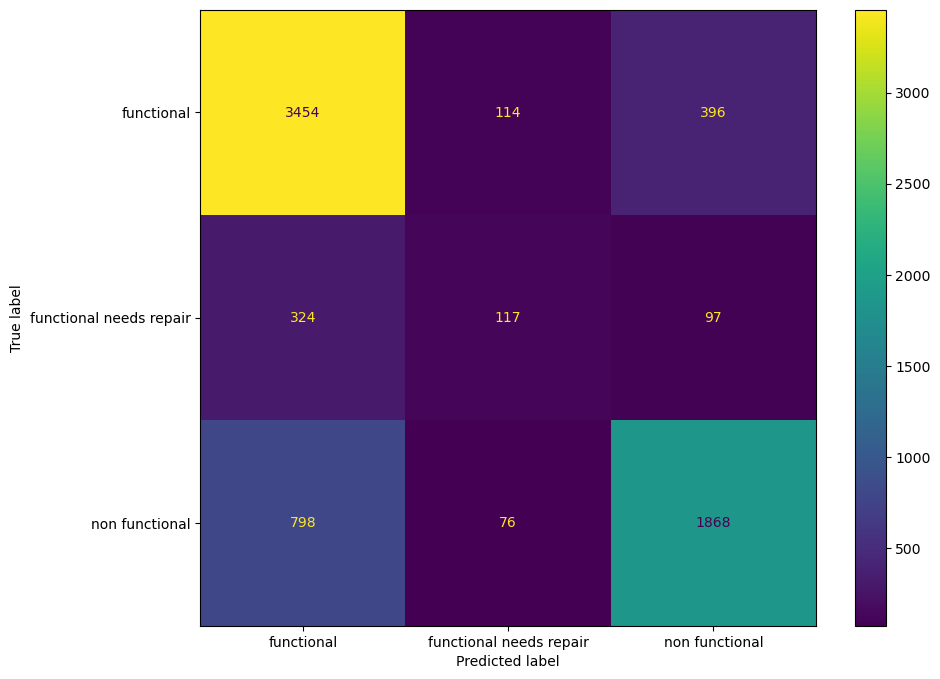

In [29]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=dt.classes_), display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(10,8))
cm_plot.plot(ax=ax)
plt.show()

<AxesSubplot:xlabel='date_recorded'>

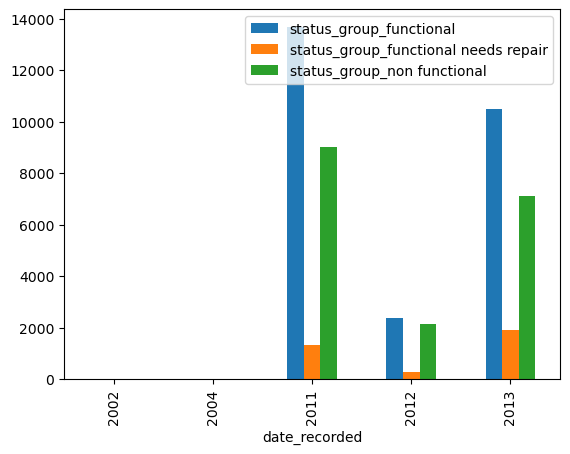

In [30]:
data = train_df.copy()

data['date_recorded'] = pd.to_datetime(train_df['date_recorded'], infer_datetime_format=False)

data = pd.get_dummies(data, prefix=['status_group'], columns=['status_group'])

data.groupby(data["date_recorded"].dt.year).sum().plot(y=['status_group_functional',
       'status_group_functional needs repair', 'status_group_non functional'], kind="bar")

In [31]:
### The .describe of date_recorded data

pd.to_datetime(train_df['date_recorded'], infer_datetime_format=False).describe(datetime_is_numeric=True)

count                            48288
mean     2012-03-21 03:53:42.465208832
min                2002-10-14 00:00:00
25%                2011-03-28 00:00:00
50%                2012-10-03 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object